In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir("../../")

In [3]:
from programs import lstm_tool

In [25]:
# original_predicter = tf.keras.models.load_model('./model/power_lstm')
obo_directee = tf.keras.models.load_model('./model/power_lstm')
# abo_directee = tf.keras.models.load_model('./model/power_lstm')

less_trained_predicter = tf.keras.models.load_model('./model/short_lstm/')

# all_checker = tf.keras.models.load_model('./model/all_checker.h5')
# predict_checker = tf.keras.models.load_model('./model/checker.h5')
partitial_checker = tf.keras.models.load_model('./model/l_checker.h5')

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\backend.py", line 4769, in <genexpr>
    output_ta_t = tuple(  File "c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


In [38]:
df = pd.read_excel('./documents/nov_nine_var.xlsx').iloc[:,1:22]
scaler = MinMaxScaler()
scale_df = pd.DataFrame(scaler.fit_transform(df))

In [45]:
diff_df = scale_df.diff()[1:431]

In [46]:
diff_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.066105,-0.186407,0.009788,-0.015430,...,-0.003759,-0.005952,-0.010695,0.000000,0.000000,0.002386,0.000000,-0.003980,-0.049614,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.419381,0.131870,0.050518,0.037223,...,0.018797,0.000000,0.000000,-0.014925,0.037234,0.000814,0.000000,-0.001942,-0.021836,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.011929,-0.087540,-0.055657,0.002863,...,-0.015038,-0.053571,-0.010695,0.037313,-0.005319,-0.000407,0.000000,0.001182,0.022685,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001338,-0.167599,0.032274,-0.009862,...,-0.026316,0.023810,-0.016043,-0.014925,0.000000,0.002413,0.000000,0.001548,0.007022,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.042748,-0.063488,-0.174012,-0.034439,...,-0.116541,0.023810,0.000000,0.134328,0.026596,-0.000800,0.000000,0.001086,-0.003086,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.0,-0.000078,-0.005409,0.001436,0.000708,0.000556,0.013920,0.094392,-0.013486,-0.034598,...,-0.022556,0.011905,0.005348,0.000000,0.005319,0.002847,0.000000,0.021803,0.003704,0.0
427,0.0,-0.000175,-0.005470,0.002081,0.000652,0.001099,-0.001154,0.014334,-0.027706,0.005567,...,-0.030075,0.011905,0.005348,0.007463,0.000000,0.006644,0.015124,0.015727,-0.042052,0.0
428,0.0,-0.000192,-0.005501,0.001387,0.002220,0.000735,-0.006592,-0.019508,-0.026836,-0.000875,...,-0.033835,0.011905,0.000000,0.000000,0.005319,0.005695,0.000000,0.008844,0.050386,0.0
429,0.0,-0.000510,-0.006783,0.000860,0.002120,0.000070,-0.019274,0.146903,0.039968,-0.052573,...,-0.041353,0.017857,0.005348,0.037313,0.000000,0.002441,0.000000,0.012766,0.065895,0.0


In [13]:
x, y = lstm_tool.make_sequence(X, 60)
s = X[0:200].reshape(1, 200, 21)

In [8]:
d = x[0:1]
for i in range(500):
    with tf.GradientTape() as tape:
        pred = obo_directee(d)

        error = tf.keras.losses.mean_squared_error(pred)

    grads = tape.gradient(error, obo_directee.trainable_weights)
    obo_directee.optimizer.apply_gradients(zip(grads, obo_directee.trainable_weights))

TypeError: Missing required positional argument

In [8]:
all_checker(s)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9999991]], dtype=float32)>

In [9]:
predict_checker([x[0:2].reshape(1, 120, 21), x[3][0].reshape(1, 21)])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.87545455]], dtype=float32)>

In [15]:
partitial_checker(s)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [16]:
predict_period = x.shape[0]

In [22]:
def long_period_predict(model, data, predict_period):
    hist = data.reshape(60, 21)

    for i in range(60, predict_period):
        pred = model(data)
        data = lstm_tool.shift_data(data, pred)
        hist = tf.concat((hist, pred), axis=0)

    return hist

In [27]:
i = 0
data = x[i:i+1]

abo_directee = less_trained_predicter

while True:
    with tf.GradientTape() as tape:
        s = long_period_predict(abo_directee, data, 200).reshape(1, 200, 21)
        check = partitial_checker(s)

        error = tf.losses.binary_crossentropy(tf.ones_like(check), check)

    grads = tape.gradient(error, abo_directee.trainable_weights)
    abo_directee.optimizer.apply_gradients(zip(grads, abo_directee.trainable_weights))

    print(f"i: {i}, check: {round(float(check), 3)}")
    if check > 0.9:
        data = lstm_tool.shift_data(data, abo_directee(data))

        i += 1

i: 0, check: 1.0
i: 1, check: 1.0
i: 2, check: 1.0
i: 3, check: 1.0
i: 4, check: 1.0
i: 5, check: 1.0
i: 6, check: 1.0
i: 7, check: 1.0
i: 8, check: 1.0
i: 9, check: 1.0
i: 10, check: 1.0
i: 11, check: 1.0


KeyboardInterrupt: 

In [15]:
i = 0
inp = x[i:i+2].reshape(1, 120, 21)
sum_loss = 0

while True:
    while True:
        with tf.GradientTape() as tape:
            outp = obo_directee(inp[:,60:120,:])
            check = predict_checker([inp, outp])

            error = tf.losses.mean_squared_error(outp, x[i,-1].reshape(1, 21))
            reality = tf.losses.binary_crossentropy(tf.ones_like(check), check)
            loss = error + reality

            sum_loss += loss

        if i >= predict_period-2:
            break

        if i % 100 == 0 and i != 0:
            print(i)

        t = check[0][0]
        if t < 0.85:
            print(f"i: {i}, prob: {round(float(t), 3)}, error: {round(float(error),2)}")

            inp = x[0:2].reshape(1, 120, 21)

            grads = tape.gradient(loss, obo_directee.trainable_weights)
            obo_directee.optimizer.apply_gradients(zip(grads, obo_directee.trainable_weights))

            i = 0

        else:
            hist = tf.concat((hist, outp), axis=0)
            inp = lstm_tool.shift_data(inp, outp, 120)
            i += 1

    with tf.GradientTape() as tape:
        s = long_period_predict(obo_directee, x[0:1], predict_period).reshape(1, 431, 21)
        check = all_checker(s)

        error = tf.losses.binary_crossentropy(tf.ones_like(check), check)

    grads = tape.gradient(error, obo_directee.trainable_weights)
    obo_directee.optimizer.apply_gradients(zip(grads, obo_directee.trainable_weights))
    
    print(f"c: {round(check, 3)}")

    if check > 0.9:
        break

i: 80, prob: 0.849, error: 0.07
i: 92, prob: 0.837, error: 0.08
i: 94, prob: 0.796, error: 0.02
100
i: 127, prob: 0.821, error: 0.01


KeyboardInterrupt: 

In [77]:
test = long_period_predict(obo_directee, x[0:1], predict_period).reshape(1, 431, 21)
print(all_checker(test))

tf.Tensor([[2.4463502e-06]], shape=(1, 1), dtype=float32)


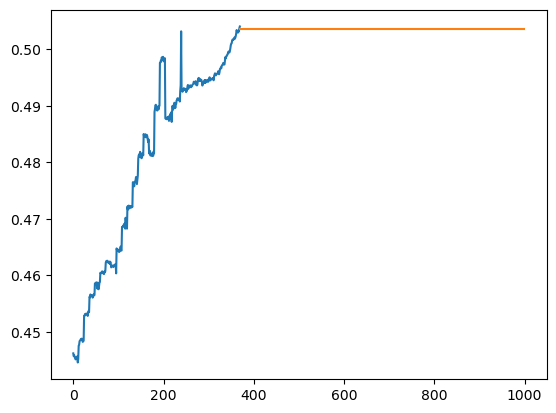

In [30]:
plt.plot([i for i in range(370)], lstm_tool.dnn_model(X[60:430]))
plt.plot([i for i in range(370, 1000)], np.array([lstm_tool.dnn_model(X[430].reshape(1, 21)) for i in range(370, 1000)]).reshape(630))
plt.show()

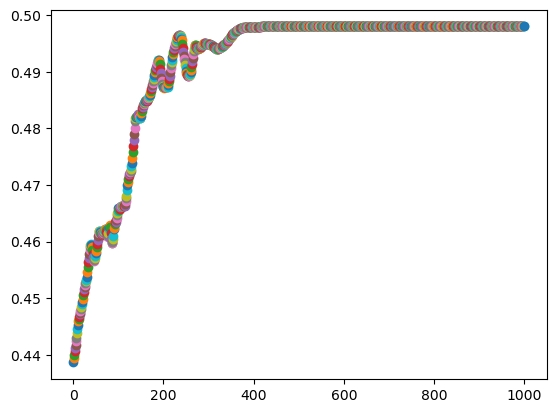

In [29]:
ppp_data = lstm_tool.plot_tree([less_trained_predicter], x[0:1], 1, 1000, True)

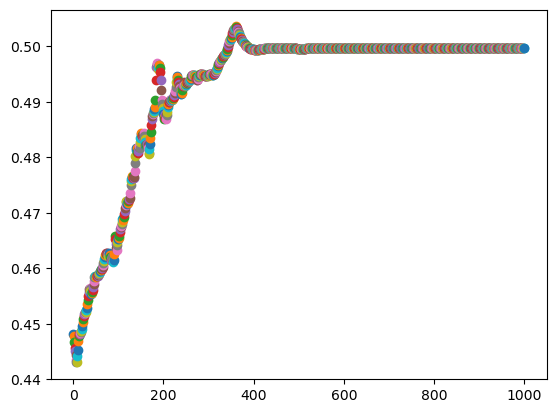

In [28]:
recursive_data = lstm_tool.plot_tree([obo_directee], x[0:1], 1, 1000, True)

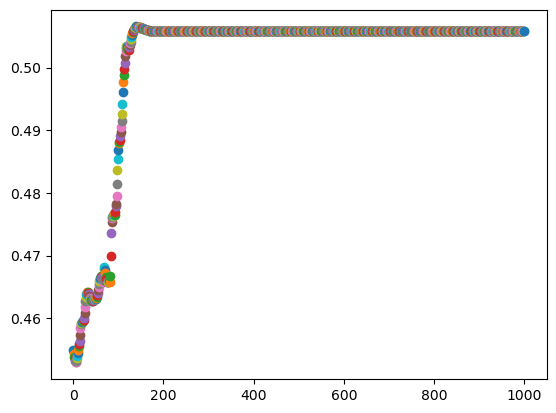

In [13]:
compare_data = lstm_tool.plot_tree([abo_directee], x[0:1], 1, 1000, True)
plt.show()